# Praktikum Maschinelles Lernen WS 15/16

 <table>
  <tr>
    <td>Name</td>
    <td>Vorname</td>
    <td>Matrikelnummer</td>
    <td>Datum</td>
  </tr>
  <tr>
    <td>Alt</td>
    <td>Tobias</td>
    <td>282385</td>
    <td>02.11.2015</td>
  </tr>
</table> 

## Aufgabe 1 - Explorative Analyse des Datensatzes "Boston Housing"

Imports der Python Libraries.<br>
Das SKLearn-Module hat Zugriff auf die Boston Housing data

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn


In [3]:
from sklearn.datasets import load_boston
bHousing = load_boston()

Metadaten über den Boston-Housing Datensatz wie biespielsweise die Anzahl der Einträge (506)<br>
bzw. Anzahl der Variablen (13) und die Beischreibung.

In [4]:
bHousing.keys()

['data', 'feature_names', 'DESCR', 'target']

In [5]:
bHousing.data.shape

(506, 13)

In [6]:
print bHousing.feature_names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print bHousing.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Boston Housing wird in Pandas Frame konvertiert. <br>
Mit head kann man sich das Datenschema anschauen (head zeigt nicht alle Daten - 5 rows).

In [8]:
pdHousing = pd.DataFrame(bHousing.data)
pdHousing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


Der 14. Spalte wird nun das Target zugewiesen

In [9]:
pdHousing[13] = bHousing.target

Die Spaltennummerierungen bekommen die Feature-Namen zugewiesen. <br>
<b>MEDV entspricht dabei dem Target -> Hauspreis</b>

In [11]:
pdHousing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Not a Number Check.

In [12]:
pdHousing.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
dtype: bool

Da bereits alle False sind, entfällt dropna().<br>
Auf Duplikate überprüfen. 

In [13]:
pdHousing.duplicated().any()

False

### Explorative Statistiken

In [14]:
pdHousing.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Streumatrix der numerischen Variablen:

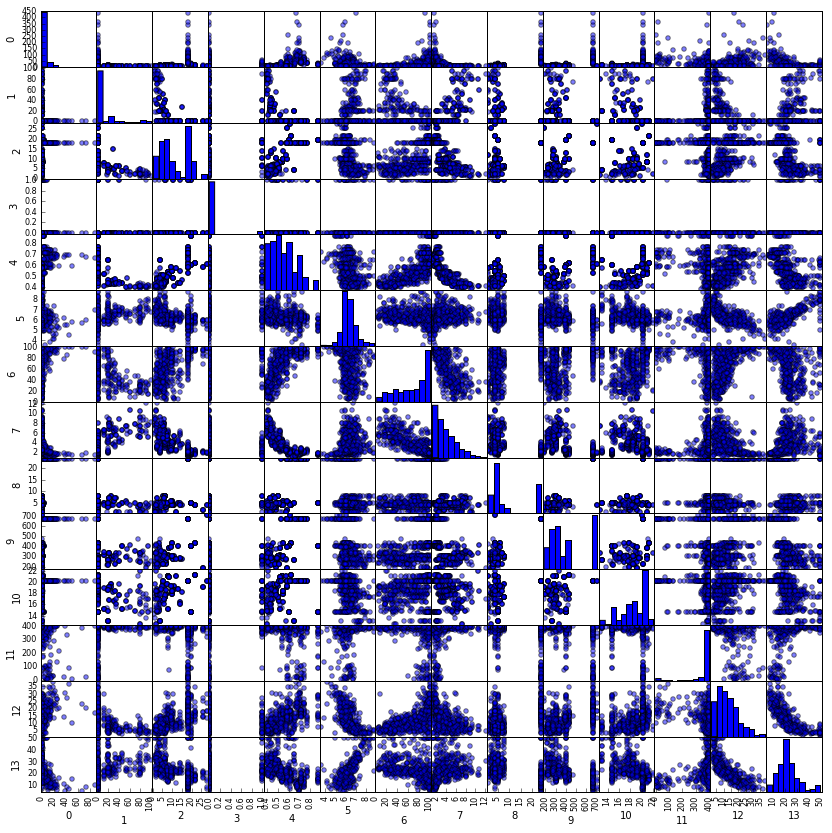

In [15]:
pd.scatter_matrix(pdHousing, figsize=(14,14), marker='o');

In [22]:
%load_ext version_information

In [23]:
%version_information numpy panda

Software versions
Python 2.7.10 64bit [GCC 5.2.1 20151010]
IPython 4.0.1
OS Linux 4.2.0 16 generic x86_64 with Ubuntu 15.10 wily
numpypanda The 'numpypanda' distribution was not found and is required by the application
Tue Jan 12 15:59:11 2016 CET